# A Comprehensive Analysis Of Predicting Housing Prices 🏡💸


## Introduction

In the ever-evolving real estate market, accurately predicting housing prices is crucial for investors, homeowners, and policy makers alike. This project aims to leverage the power of data science to forecast housing prices based on a variety of features, including location, square footage, and additional house characteristics. Through meticulous data importing, cleaning, and manipulation, followed by exploratory data analysis (EDA), hypothesis testing, and predictive modeling, we seek to uncover the underlying patterns that drive housing prices.

Our journey begins with gathering comprehensive housing data from various sources, followed by rigorous preprocessing to ensure data quality and usability. We then dive deep into the data, employing statistical and visual analysis techniques to explore relationships and trends. Hypothesis testing allows us to challenge assumptions and gain insights, while machine learning models enable us to predict prices with accuracy. Finally, we encapsulate our findings, model performance, and insights in a detailed report, complemented by visualizations to aid in understanding.

This notebook serves as a structured guide through each phase of the project, from data importation to predictive analytics and reporting. Whether you're a seasoned data scientist or a curious enthusiast, this analysis aims to provide valuable insights into the dynamics of housing prices and demonstrate the power of data-driven decision-making in the real estate domain.


# Lets Begin!


## Data Importing ⤵️

#### Here we get the dataset taken from [HERE](https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur?resource=download)

In this cell, we are importing data into our Python environment. The process of data importing involves loading data from an external source into our program. Here's what's happening in this cell:

1. Importing Required Libraries:

   - We are importing the pandas library, which is a powerful data manipulation library in Python. It's commonly used for data cleaning, exploration, and analysis.

2. Data Loading:
   - We are using the `pd.read_csv()` function to read a CSV file. The CSV file is a common data format that stores tabular data.
   - The path to the CSV file is provided as an argument to the `pd.read_csv()` function. This path could be a local file path or a URL to a raw CSV file online.
   - The data from the CSV file is loaded into a DataFrame, which is a two-dimensional tabular data structure in pandas. The DataFrame is stored in the variable `df`.

After the data is loaded, we typically perform exploratory data analysis and data cleaning tasks to prepare the data for further analysis or modeling.


In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

#Read the housing.csv file
df = pd.read_csv("housing.csv")
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


## Data Cleaning 🧼

In this cell, we perform data manipulation tasks on the DataFrame `df`. The purpose of data cleaning is to clean and transform the data to make it suitable for analysis.

1. Removing 'RM ' prefix and converting the 'Price' column to numeric format:

   - The 'Price' column contains values formatted like "RM 1,250,000".
   - We remove the 'RM ' prefix using the `str.replace()` method and replace any commas in the numbers.
   - Then, we convert the 'Price' column to a numeric format using the `pd.to_numeric()` function.

2. Filling missing values in the 'Furnishing' column with the placeholder "Unknown":

   - We use the `fillna()` method to replace missing values in the 'Furnishing' column with the string "Unknown".

3. Deleting rows where the 'Price' or 'Rooms' columns have missing values:

   - We use the `dropna()` method to remove rows where the 'Price' or 'Rooms' columns have missing values.

4. Replacing NaN values in the 'Car Parks' column with 0:
   - We use the `fillna()` method to replace NaN values in the 'Car Parks' column with 0.

After performing these data manipulation tasks, the cleaned DataFrame is displayed to verify the changes made.

Summary of the DataFrame after data cleaning:

- The DataFrame has a total of 51,980 entries.
- The columns in the DataFrame are 'Location', 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Property Type', 'Size', and 'Furnishing'.
- The 'Price', 'Rooms', 'Bathrooms', 'Car Parks', and 'Size' columns have numeric data types.
- The 'Location', 'Property Type', and 'Furnishing' columns have object data types.


In [2]:
# Remove 'RM' prefix and convert to numeric
df['Price'] = df['Price'].str.replace('RM ', '').str.replace(",", "")
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill missing values in 'Furnishing' column with 'Unknown'
df['Furnishing'] = df['Furnishing'].fillna('Unknown')

# Drop rows where 'Price' or 'Rooms' have missing values
df = df.dropna(subset=['Price', 'Rooms'])

# Replace NaN values in 'Car Parks' column with 0
df['Car Parks'] = df['Car Parks'].fillna(0)

# Define a threshold to identify rent prices
rent_price_threshold = 10000

# Filter out rent prices
df = df[df['Price'] >= rent_price_threshold]


In [3]:
print(df.isnull().sum())


Location           0
Price              0
Rooms              0
Bathrooms        409
Car Parks          0
Property Type      0
Size             932
Furnishing         0
dtype: int64


In [4]:
# Handling Missing Values
# For categorical columns,want to fill NaN with a placeholder "Unknown"
df['Furnishing'] = df['Furnishing'].fillna('Unknown')

#Delete Row where "Price" is NaN
df.dropna(subset=['Price'], inplace=True)

# Delete Row where "Rooms" is NaN
df.dropna(subset=['Rooms'], inplace=True)

# Delete Row where "Bathrooms" is NaN
df.dropna(subset=['Bathrooms'], inplace=True)

# Replace NaN values in 'Car Parks' column with 0
df['Car Parks'] = df['Car Parks'].fillna(0)


# Display the cleaned DataFrame to verify changes
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,0.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished


In [5]:
import numpy as np
# Converting Data Types

# Example: Replacing 'C' with NaN and then filling or removing NaNs
df.replace('C', np.nan, inplace=True)
df.dropna(inplace=True)  # or use df.fillna() if appropriate


#cleaning 'Size' column by following the regex pattern (Built-up|Land area) : (\d{1,3},?\d{3}|\d{3}) sq\. ft\. no match mean delete the row
df = df[df['Size'].str.match(r'(Built-up|Land area) : (\d{1,3},?\d{3}|\d{3}) sq\. ft\.', na=False)]

# Extracting Numeric Data from 'Size' column
df['Size'] = df['Size'].str.extract(r'(\d+,\d+|\d+)').replace(',', '', regex=True).astype(float)

#rename the column 'Size' to 'Sqft'
df.rename(columns={'Size': 'Sqft'}, inplace=True)

#remove the () in 'Property Type' column and remove spaces in the beginning and end of the string
df['Property Type'] = df['Property Type'].str.replace(r"\(.*\)", "", regex=True)
df['Property Type'] = df['Property Type'].str.strip()


#'Rooms' should be numeric, we need a custom function to handle "2+1" cases
def convert_rooms(room):

    if pd.isnull(room):
        return np.nan  # Return NaN for missing values
    
    parts = room.split('+')

    if len(parts) == 2:

        if parts[1] != "": # Check if the second part is not empty (e.g. "2+")

            return float(parts[0]) + float(parts[1])  # Example conversion: "2+1" becomes 3.0
        
        else:

            return float(parts[0])
    try:

        return float(room)
    
    except ValueError:
        return np.nan  # Return NaN if conversion fails

# Apply the custom function to 'Rooms' column
df['Rooms'] = df['Rooms'].apply(convert_rooms)
df.dropna(subset=['Rooms'], inplace=True)

# Handling Infinite Values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the cleaned DataFrame to verify changes
df

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,3.0,3.0,2.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6.0,7.0,0.0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3.0,4.0,2.0,Condominium,1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur",900000.0,5.0,3.0,2.0,Condominium,1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,6.0,5.0,4.0,Bungalow,7200.0,Partly Furnished
...,...,...,...,...,...,...,...,...
53878,"Bangsar, Kuala Lumpur",5100000.0,6.0,4.0,0.0,Bungalow,7168.0,Fully Furnished
53879,"Bangsar, Kuala Lumpur",5000000.0,5.0,4.0,0.0,Bungalow,15000.0,Unfurnished
53880,"Bangsar, Kuala Lumpur",5500000.0,6.0,4.0,0.0,Bungalow,7168.0,Partly Furnished
53881,"Wangsa Maju, Kuala Lumpur",480000.0,3.0,2.0,0.0,Condominium,1150.0,Unfurnished


In [7]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Data Manipulation ✏️

In this cell, we are performing several data manipulation tasks on the DataFrame `df`. Here's what's happening:

Installing the `scikit-learn` used for ML eventually and Labeling

1. One-Hot Encoding:

   - The 'Furnishing' column is being encoded using one-hot encoding. This is a process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. With one-hot, we convert each category value into a new column and assign a 1 or 0 (True/False) value to the column Also Droping the `Furnishing_Unknown` column from the table s.

2. Outlier Removal:

   - The function `IQR_outliers()` is defined to remove outliers from a specified column of the DataFrame. Outliers are extreme values that deviate from other observations on data, they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.
   - The function calculates the Interquartile Range (IQR), which is a measure of statistical dispersion, and uses it to define the upper and lower bounds for outliers. Any data points that fall below the lower bound or above the upper bound are considered outliers.
   - This function is applied to the 'Price' and 'Size' columns of the DataFrame.

3. Feature Engineering:

   - A new column 'Price per Sqft' is created by dividing the 'Price' column by the 'Size' column. This could provide a more standardized measure of price that takes into account the size of the property.

4. Label Encoding:
   - The 'Property Type' column is being encoded using label encoding. This is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

Finally, the first few rows of the cleaned DataFrame are displayed to verify the changes.

### Label Encoding of 'Property Type'

0 -> 1-sty Terrace/Link House

1 -> 1.5-sty Terrace/Link House

2 -> 2-sty Terrace/Link House

3 -> 2.5-sty Terrace/Link House

4 -> 3-sty Terrace/Link House

5 -> 3.5-sty Terrace/Link House

6 -> 4-sty Terrace/Link House

7 -> 4.5-sty Terrace/Link House

8 -> Apartment

9 -> Bungalow

10 -> Cluster House

11 -> Condominium

12 -> Flat

13 -> Residential Land

14 -> Semi-detached House

15 -> Serviced Residence

16 -> Townhouse

### Label Encoding of 'Location'

0 -> Ampang

1 -> Ampang Hilir

2 -> Bandar Damai Perdana

3 -> Bandar Menjalara

4 -> Bandar Tasik Selatan

5 -> Bangsar

6 -> Bangsar South

7 -> Batu Caves

8 -> Brickfields

9 -> Bukit Bintang

10 -> Bukit Jalil

11 -> Bukit Tunku (Kenny Hills)

12 -> Chan Sow Lin

13 -> Cheras

14 -> City Centre

15 -> Country Heights Damansara

16 -> Damansara

17 -> Damansara Heights

18 -> Desa Pandan

19 -> Desa ParkCity

20 -> Desa Petaling

21 -> Dutamas

22 -> Gombak

23 -> Jalan Ipoh

24 -> Jalan Klang Lama (Old Klang Road)

25 -> Jalan Kuching

26 -> Jalan Sultan Ismail

27 -> Jinjang

28 -> KL City

29 -> KL Eco City

30 -> KL Sentral

31 -> KLCC

32 -> Kepong

33 -> Keramat

34 -> Kuchai Lama

35 -> Mid Valley City

36 -> Mont Kiara

37 -> OUG

38 -> Pandan Indah

39 -> Pandan Jaya

40 -> Pandan Perdana

41 -> Pantai

42 -> Puchong

43 -> Rawang

44 -> Salak Selatan

45 -> Segambut

46 -> Sentul

47 -> Seputeh

48 -> Setapak

49 -> Setiawangsa

50 -> Sri Hartamas

51 -> Sri Petaling

52 -> Sungai Besi

53 -> Taman Desa

54 -> Taman Melawati

55 -> Taman Tun Dr Ismail

56 -> Titiwangsa

57 -> Wangsa Maju

58 -> taman cheras perdana


In [6]:
# Encode the 'Furnishing' column using one-hot encoding
if 'Furnishing' in df.columns:
    df = pd.get_dummies(df, columns=['Furnishing'], prefix='Furnishing')
    # Remove row with "Furnishing_Unknown" column
    df = df.drop(columns=['Furnishing_Unknown'])
else:
    print("The 'Furnishing' column is not present in the DataFrame.")


# Remove extreme outliers in 'Sqft' column
df = df[df['Sqft'] <= 10000]  # Adjust the threshold as needed

df['PricePerSqft'] = df['Price'] / df['Sqft']

# Remove outliers using Interquartile Range (IQR)
def IQR_outliers(df, column, multiplier):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

df = IQR_outliers(df, 'PricePerSqft', multiplier=1.0)  # Stricter threshold
df = IQR_outliers(df, 'Price', multiplier=1.0)  # Stricter threshold
df = IQR_outliers(df, 'Sqft', multiplier=1.0)  # Stricter threshold

# Remove outliers using Median Absolute Deviation (MAD)
def MAD_outliers(df, column, threshold):
    median = df[column].median()
    deviations = abs(df[column] - median)
    MAD = deviations.median()
    lower_bound = median - threshold * MAD
    upper_bound = median + threshold * MAD
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

df = MAD_outliers(df, 'Price', threshold=2.5)  # Stricter threshold
df = MAD_outliers(df, 'Sqft', threshold=2.5)  # Stricter threshold

# Remove outliers using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df['Price'])) < 2.5)]  # Stricter threshold
df = df[(np.abs(stats.zscore(df['Sqft'])) < 2.5)]  # Stricter threshold
df = df[(np.abs(stats.zscore(df['Rooms'])) < 2.5)]  # Stricter threshold
df = df[(np.abs(stats.zscore(df['Bathrooms'])) < 2.5)]  # Stricter threshold
df = df[(np.abs(stats.zscore(df['Car Parks'])) < 2.5)]  # Stricter threshold
df = df[(np.abs(stats.zscore(df['PricePerSqft'])) < 2.5)]  # Stricter threshold

# Label encode the 'Property Type' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Property Type'] = label_encoder.fit_transform(df['Property Type'])

# Encode the 'Location' column
df["Location"] = df["Location"].str.replace(", Kuala Lumpur", "")
df['Location'] = label_encoder.fit_transform(df['Location'])
# Display the cleaned DataFrame to verify changes
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,PricePerSqft
9,51,385000.0,3.0,2.0,1.0,6,904.0,False,True,False,425.884956
26,10,610000.0,4.0,2.0,2.0,8,1236.0,False,True,False,493.527508
33,1,460000.0,1.0,1.0,1.0,11,613.0,True,False,False,750.407830
48,36,1150000.0,3.0,2.0,2.0,8,1200.0,False,True,False,958.333333
50,10,930000.0,4.0,3.0,2.0,8,1513.0,False,True,False,614.672835


## Exploratory Data Analysis (EDA) and Visualization 📊 📈

Exploratory Data Analysis (EDA) allows us to dive deep into the dataset, uncovering patterns, relationships, and insights. Through visualizations such as histograms, scatter plots, and heatmaps, we gain a comprehensive understanding of the data's characteristics and the factors influencing housing prices. This visual and statistical exploration is pivotal in guiding our hypothesis testing and predictive modeling efforts.


In [9]:
%pip install matplotlib

%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
#show the summary statistics of the cleaned DataFrame
df.describe()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Sqft,PricePerSqft
count,20692.000000,2.069200e+04,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000,20692.000000
mean,29.159724,6.032197e+05,2.892954,2.042335,1.165475,8.712208,1076.064373,568.507180
std,16.630846,2.198415e+05,0.750876,0.474415,0.760709,1.956750,242.462019,194.634557
min,0.000000,9.500000e+04,1.000000,1.000000,0.000000,0.000000,562.000000,104.347826
25%,13.000000,4.350000e+05,3.000000,2.000000,1.000000,8.000000,904.000000,417.391304
50%,26.000000,5.750000e+05,3.000000,2.000000,1.000000,8.000000,1065.000000,527.980722
75%,46.000000,7.300000e+05,3.000000,2.000000,2.000000,11.000000,1253.000000,681.297895
max,58.000000,1.230000e+06,4.000000,3.000000,3.000000,12.000000,1635.000000,1156.373193


### Distribution Analysis


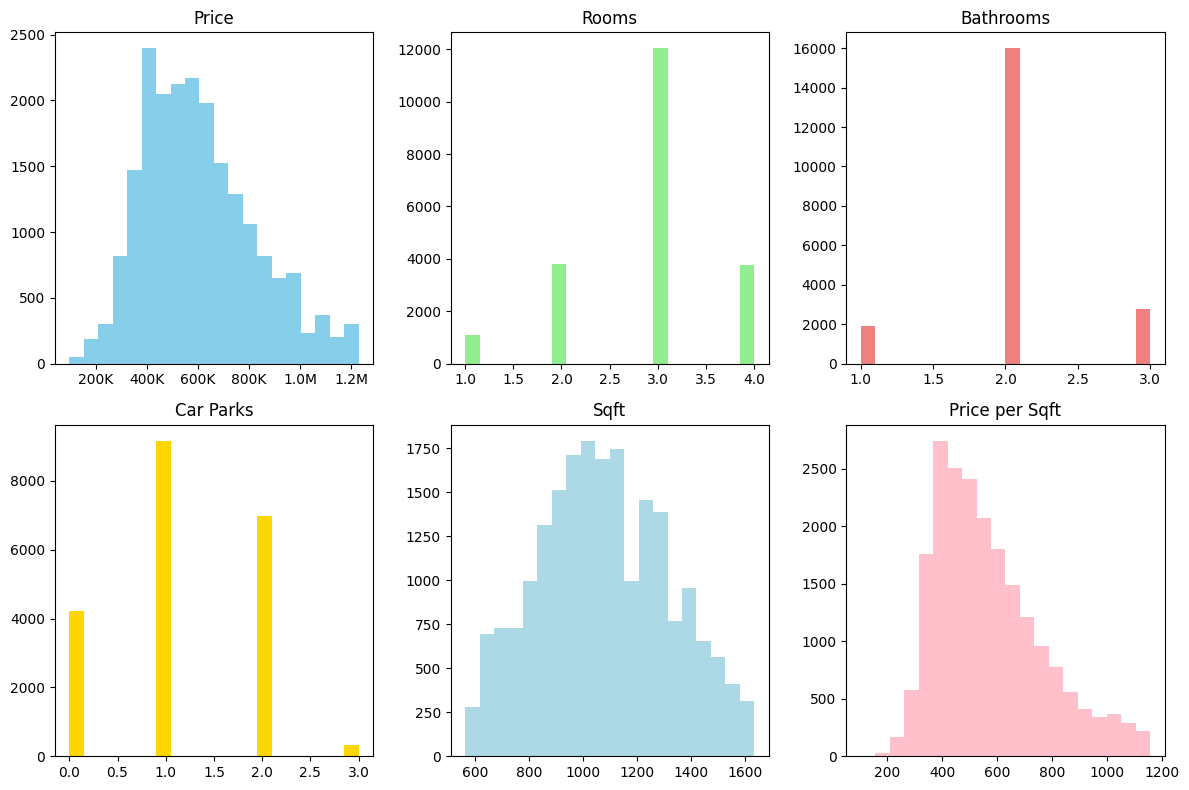

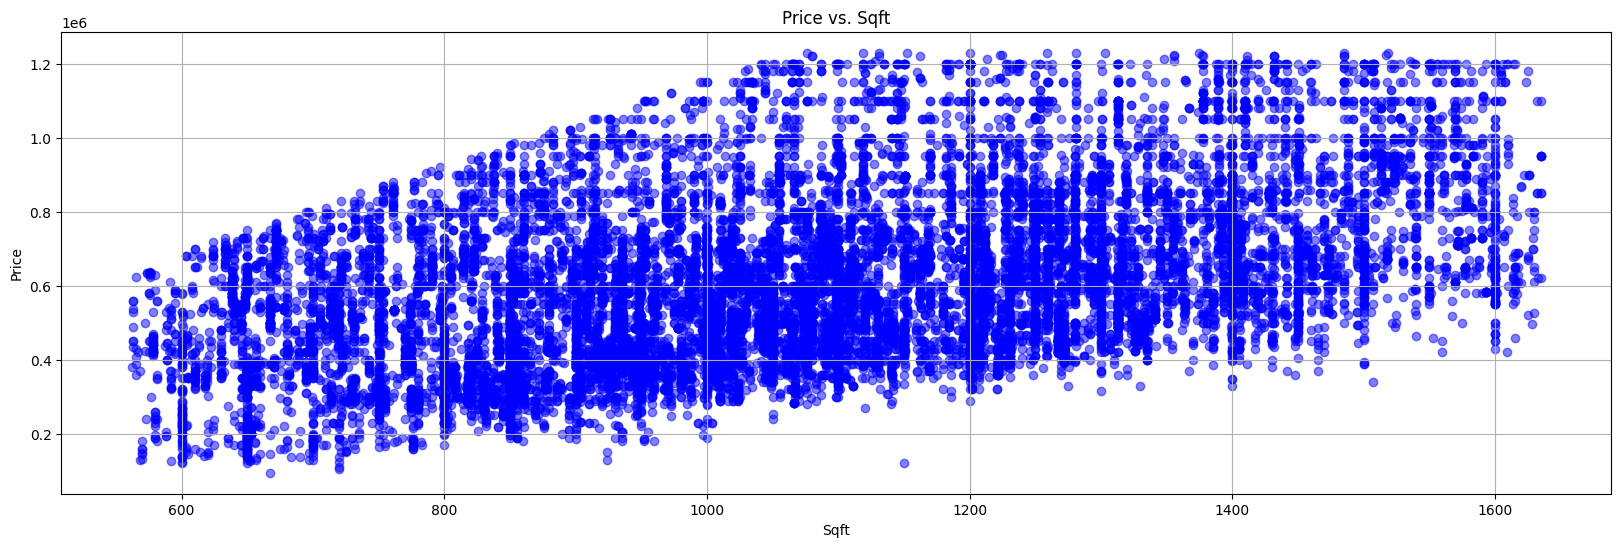

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Create subplots for histograms
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Plot histograms for 'Price', 'Rooms', 'Bathrooms', 'Car Parks', 'Sqft', and 'Price per Sqft'
# Custom formatter function to display numbers in thousands (K) and millions (M)
def custom_formatter(x, pos):
    if x >= 1e6:  # If 1 million or more
        return '{:,.1f}M'.format(x*1e-6)  # Convert to M
    elif x >= 1e3:  # If 1 thousand or more
        return '{:,.0f}K'.format(x*1e-3)  # Convert to K
    else:
        return '{:,.0f}'.format(x)  # No suffix

axs[0, 0].hist(df['Price'], bins=20, color='skyblue')
axs[0, 0].set_title('Price')
axs[0, 0].xaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))

axs[0, 1].hist(df['Rooms'], bins=20, color='lightgreen')
axs[0, 1].set_title('Rooms')

axs[0, 2].hist(df['Bathrooms'], bins=20, color='lightcoral')
axs[0, 2].set_title('Bathrooms')

axs[1, 0].hist(df['Car Parks'], bins=20, color='gold')
axs[1, 0].set_title('Car Parks')

axs[1, 1].hist(df['Sqft'], bins=20, color='lightblue')
axs[1, 1].set_title('Sqft')

axs[1, 2].hist(df['PricePerSqft'], bins=20, color='pink')
axs[1, 2].set_title('Price per Sqft')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# use matplot to create a scatter plot of 'Price' vs 'Sqft'
plt.figure(figsize=(20, 6))
plt.scatter(df['Sqft'], df['Price'], color='blue', alpha=0.5)
plt.title('Price vs. Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.grid(True)
plt.show()

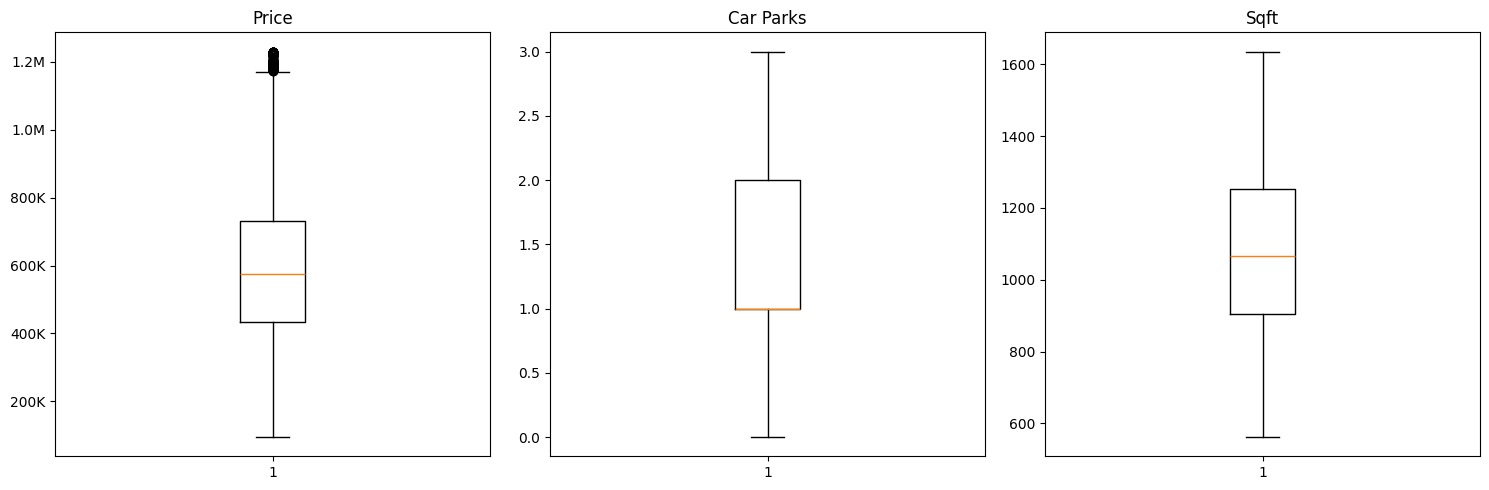

In [21]:

# Create subplots for box plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for 'Price', 'Rooms', 'Bathrooms', 'Car Parks', and 'Sqft'
axs[0].boxplot(df['Price'])
axs[0].set_title('Price')
axs[0].yaxis.set_major_formatter(ticker.FuncFormatter(custom_formatter))
axs[1].boxplot(df['Car Parks'])
axs[1].set_title('Car Parks')
axs[2].boxplot(df['Sqft'])
axs[2].set_title('Sqft')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


### Distribution Analysis Results 📜

#### Price

- **X-axis**: Property prices ranging from approximately 200K to 1.2M.
- **Y-axis**: Number of properties within each price range.
- **Observation**:
  - Most properties are priced between 400K and 800K.
  - There is a noticeable peak around the 600K mark.

#### Rooms

- **X-axis**: Number of rooms in the properties, ranging from 1 to 4.
- **Y-axis**: Number of properties with each specific number of rooms.
- **Observation**:
  - Majority of properties have 3 rooms.
  - Properties with 4 rooms are the next most common.

#### Bathrooms

- **X-axis**: Number of bathrooms in the properties, ranging from 1 to 3.
- **Y-axis**: Number of properties with each specific number of bathrooms.
- **Observation**:
  - Most properties have 2 bathrooms.
  - There are fewer properties with 1 or 3 bathrooms.

#### Car Parks

- **X-axis**: Number of car parks available in the properties, ranging from 0 to 3.
- **Y-axis**: Number of properties with each specific number of car parks.
- **Observation**:
  - Majority of properties have 1 car park.
  - Properties with 2 car parks are also common.

#### Sqft (Square Feet)

- **X-axis**: Size of the properties in square feet, ranging from around 600 to 1600 sqft.
- **Y-axis**: Number of properties within each size range.
- **Observation**:
  - Most properties have sizes ranging from 800 to 1400 sqft.
  - There is a significant concentration of properties around 1000 sqft.

#### Price per Sqft

- **X-axis**: Price per square foot of the properties, ranging from around 200 to 1200.
- **Y-axis**: Number of properties within each price per square foot range.
- **Observation**:
  - Most properties have a price per square foot between 200 and 600.
  - There is a decline in the number of properties as the price per square foot increases.

### Scatter Plot

#### Axes

- **X-axis (Sqft)**: Represents the size of the properties in square feet, ranging from around 600 to 1600 sqft.
- **Y-axis (Price)**: Represents the price of the properties, ranging from around 0.2M to 1.2M.

#### Observations

- **Positive Correlation**: There is a positive correlation between the size of the property and its price. Generally, as the size (sqft) increases, the price also increases.
- **Spread of Data**: The data points are widely spread, indicating a variation in price for properties of similar sizes. This could be due to other factors affecting the price, such as location, amenities, and condition of the property.
- **Clusters**: There are denser clusters of data points around certain sizes and prices, suggesting that some size ranges are more common and have a standard pricing range.

### Box Plots For Price, Car Parks and Sqft

#### Price

- **Median**: The median price is around 600K.
- **Interquartile Range (IQR)**: The middle 50% of the data (from the 25th to 75th percentile) ranges from approximately 400K to 800K.
- **Outliers**: There are several outliers above 1.2M, indicating some properties are priced significantly higher than the rest.

#### Car Parks

- **Median**: The median number of car parks is 1.
- **Interquartile Range (IQR)**: The middle 50% of the data ranges from approximately 0.5 to 2 car parks.
- **Spread**: The data ranges from 0 to 3 car parks, showing variability in car park availability.

#### Sqft

- **Median**: The median size of the properties is around 1000 sqft.
- **Interquartile Range (IQR)**: The middle 50% of the data ranges from approximately 800 to 1200 sqft.
- **Spread**: The data ranges from around 600 to 1600 sqft, showing variability in property sizes.

#### Observations

- The box plots provide a summary of the distribution of each feature, including the median, IQR, and potential outliers.
- **Price** shows a wide range of values with significant outliers on the higher end.
- **Car Parks** have a smaller range and fewer outliers.
- **Sqft** shows a moderate range with a relatively uniform distribution.


# Hypothesis Testing 🧪👨‍🏫

In this section, we will conduct hypothesis tests to determine the significance of various factors on housing prices. We'll focus on two main hypotheses:

1. The impact of location on housing prices
2. The significance of specific features (e.g., number of rooms, car parks) on housing prices


### Hypothesis 1: Impact of Location on Housing Prices

- **Null Hypothesis (H0)**: There is no significant difference in housing prices across different locations.
- **Alternative Hypothesis (H1)**: There is a significant difference in housing prices across different locations.

We will perform an ANOVA test to compare the means of housing prices across different locations.


In [13]:
# Importing necessary libraries for hypothesis testing
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Displaying the first few rows of the dataset to understand its structure
df.head()

# Performing ANOVA test to compare means of housing prices across different locations
anova_model = ols('Price ~ C(Location)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table for Location Impact on Housing Prices")
print(anova_table)


ANOVA Table for Location Impact on Housing Prices
                   sum_sq       df           F  PR(>F)
C(Location)  3.850439e+14     58.0  222.740595     0.0
Residual     6.149577e+14  20633.0         NaN     NaN


**Interpreting the Results:**

- If the p-value from the ANOVA table is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in housing prices across different locations.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference in housing prices across different locations.

Based on the ANOVA table results:

- The p-value for the 'Location' variable is 0.0, which is less than 0.05.
- Therefore, we reject the null hypothesis and conclude that there is a significant difference in housing prices across different locations.


### Hypothesis 2: Significance of Specific Features (e.g., Number of Rooms) on Housing Prices

- **Null Hypothesis (H0)**: The number of rooms does not significantly affect housing prices.
- **Alternative Hypothesis (H1)**: The number of rooms significantly affects housing prices.

We will perform a linear regression to test the impact of the number of rooms on housing prices.


In [14]:
# Performing linear regression to test the impact of square footage on housing prices
regression_model = ols('Price ~ Sqft', data=df).fit()
print("Summary of Linear Regression Model for Sqft Impact on Housing Prices")
print(regression_model.summary())


Summary of Linear Regression Model for Sqft Impact on Housing Prices
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     6044.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:29:30   Log-Likelihood:            -2.8123e+05
No. Observations:               20692   AIC:                         5.625e+05
Df Residuals:                   20690   BIC:                         5.625e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

**Interpreting the Results:**

- If the p-value for the 'Sqft' variable in the regression model is less than 0.05, we reject the null hypothesis and conclude that the square footage significantly affects housing prices.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the square footage does not significantly affect housing prices.

Based on the regression model results:

- The p-value for the 'Sqft' variable is 0.000, which is less than 0.05.
- Therefore, we reject the null hypothesis and conclude that the square footage significantly affects housing prices.
- The R-squared value is 0.226, indicating that approximately 22.6% of the variance in housing prices can be explained by the square footage.


### Hypothesis 3: Significance of the Number of Bathrooms on Housing Prices

- **Null Hypothesis (H0)**: The number of bathrooms does not significantly affect housing prices.
- **Alternative Hypothesis (H1)**: The number of bathrooms significantly affects housing prices.

We will perform a linear regression to test the impact of the number of bathrooms on housing prices.


In [15]:
# Performing linear regression to test the impact of the number of bathrooms on housing prices
regression_model_bathrooms = ols('Price ~ Bathrooms', data=df).fit()
print("Summary of Linear Regression Model for Bathrooms Impact on Housing Prices")
print(regression_model_bathrooms.summary())


Summary of Linear Regression Model for Bathrooms Impact on Housing Prices
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1160.
Date:                Sun, 02 Jun 2024   Prob (F-statistic):          2.29e-247
Time:                        14:29:37   Log-Likelihood:            -2.8332e+05
No. Observations:               20692   AIC:                         5.666e+05
Df Residuals:                   20690   BIC:                         5.667e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

**Interpreting the Results:**

- If the p-value for the 'Bathrooms' variable in the regression model is less than 0.05, we reject the null hypothesis and conclude that the number of bathrooms significantly affects housing prices.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the number of bathrooms does not significantly affect housing prices.

Based on the regression model results:

- The p-value for the 'Bathrooms' variable is 0.000, which is less than 0.05.
- Therefore, we reject the null hypothesis and conclude that the number of bathrooms significantly affects housing prices.
- The R-squared value is 0.053, indicating that approximately 5.3% of the variance in housing prices can be explained by the number of bathrooms.


## Predictive Analytics (Machine Learning) 🤖📊

Transitioning from analysis to prediction, we employ machine learning models to forecast housing prices. This phase involves splitting our data into training and testing sets, selecting appropriate models, and training them on our dataset. Through model evaluation, we assess the accuracy and effectiveness of our predictions, striving for models that offer both high precision and generalizability.

### We took 2 approaches when it came to Predictive Analysis

1. **Linear Regression**, Reason is we wanted to check if our data is well maintained to be fitted into a model like linear regression and see results, So we used this just as Lowest Standered Possible

2. xgboost, Using **XGBRegressor** found that would be the most optimal model since it works with wighting the featuers and pridicting a price for a property sicne all each feature affect the price in many diffrenet ways


In [26]:
# prepare the data for training and testing
from sklearn.model_selection import train_test_split

# train the model tp predict the price of a property based on its features using a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target on the training data
y_train_pred = model.predict(X_train)

# Predict the target on the testing data
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error on the training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Calculate the R^2 score on the training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')

print(f"model accuracy: {model.score(X_test, y_test)}")

# Display the model coefficients with their corresponding feature names
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

coefficients

Train MSE: 1926356893.64
Test MSE: 1987255981.95
Train R^2: 0.96
Test R^2: 0.96
model accuracy: 0.9587159265058737


,Feature,Coefficient
0,Location,-53.587667
1,Rooms,7605.885268
2,Bathrooms,19547.496735
3,Car Parks,271.276110
4,Property Type,-180.304625
5,Sqft,539.852895
6,Furnishing_Fully Furnished,200.048503
7,Furnishing_Partly Furnished,-1251.931239
8,Furnishing_Unfurnished,2235.214553
9,PricePerSqft,998.024236


### Observing Linear Regression Traning

**Mean Squared Error (MSE):**

- **Train MSE:** `1,926,356,893.64`
- **Test MSE:** `1,987,255,981.95`

  The MSE values for both the training and testing datasets are relatively close, indicating that the model has similar performance on both datasets. This suggests that the model is `not significantly overfitting or underfitting`.

**R-squared (R²):**

- **Train R²:** `0.96`
- **Test R²:** `0.96`

  The R² values for both the training and testing datasets are very high (0.96), which implies that the model explains 96% of the variance in the data for both sets. This indicates a `strong fit` of the model to the data.

**Model Score**

- **Accuracy** `0.9587159265058737`

  The model accuracy is approximately `95.87%`, indicating a `high level of predictive performance`.

  Overall, these metrics suggest that the model has `good predictive performanc`e and `generalizes well` to unseen data.


### Time to put it to the Test and start using one property to compare with the other models and changes!

We will use a property Post in PropertyGuru [READY TO MOVE IN [ Free Fully Furnished ] Cash Back Walking Distance To MRT LRT Bangsar South](https://www.propertyguru.com.my/property-listing/ready-to-move-in-free-fully-furnished-cash-back-walking-distance-to-mrt-lrt-bangsar-south-for-sale-by-henry-lau-38320139) Listed on the `14 Jun 2024`

#### Info of the house

#### Price is `RM 452,675`

- Location **Bangsar South** Location ID `6`
- Rooms `3`
- Bathrooms `2`
- Car Parks `2` as claimed in discription of property "Free 2 Car Park For All Unit"
- Property Type **Condominium** ID `11`
- Sqft `1238`
- Furnishing `Fully`
- PricePerSqft `366`

we create a `property_info` var to use it later in other predictions


In [27]:
property_info = {
    'Location': 6,
    'Rooms': 3,
    'Bathrooms': 2,
    'Car Parks': 2,
    'Property Type': 11,
    'Sqft': 1238,
    'Furnishing_Fully': 1,
    'Furnishing_Partially': 0,
    'Furnishing_Unfurnished': 0,
    'PricePerSqft': 366
}

In [28]:
import numpy as np

# Coefficients from LR model
coefficients = np.array([-53.587667, 7605.885268, 19547.496735, 271.276110, -180.304625,
                         539.852895, 200.048503, -1251.931239, 2235.214553, 998.024236])

# values Format: [Location, Rooms, Bathrooms, Car Parks, Property Type, Sqft, Furnishing_Fully Furnished, Furnishing_Partly Furnished, Furnishing_Unfurnished, PricePerSqft]
feature_values = np.array([property_info['Location'], property_info['Rooms'], property_info['Bathrooms'], property_info['Car Parks'], property_info['Property Type'], property_info['Sqft'], property_info['Furnishing_Fully'], property_info['Furnishing_Partially'], property_info['Furnishing_Unfurnished'], property_info['PricePerSqft']])

# Calculate the predicted price
predicted_price = model.intercept_ + np.dot(coefficients, feature_values)
predicted_price = "{:,.2f}".format(predicted_price)

print(f"The predicted price of the property is: RM {predicted_price}")

The predicted price of the property is: RM 490,203.10


### Results of testing Linear Regression model

We can see that the model predicted `RM 490,203.10` and the actual was `RM 452,675` which indicates a relativly good prediction


### Improving with second model

We procceed with the second model wich uses `XGBRegressor` from xgboost library

We start by importing and fitting the data


In [16]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
# try XGBRegressor model
from xgboost import XGBRegressor

# Initialize the XGBRegressor model
model = XGBRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target on the training data
y_train_pred = model.predict(X_train)

# Predict the target on the testing data
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error on the training and testing data

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

Train MSE: 15490137.67
Test MSE: 30032117.68


### Results of fitting XGBRegressor

**Observations**

- **Mean Squared Error** we can see that the MSE for XGB is significantly lower than Linear Regression which is always a good sign

We try to optimize more since more potential seems to come from XGB by Using `Optuna` to find the best Hyperparameters for XGB


## Find Best Params With optuna

We start importing and setting up

Then we create the Objective function that holds a set of params with a wide range to start and test out which are the best hyperparams for the least MSE possible


In [18]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [125]:
import optuna

# Define an objective function to optimize
def objective(trial):

    # Define the hyperparameters to optimize

    params = {
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008, 0.009, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02]),
        'n_estimators': trial.suggest_categorical('n_estimators', [1000, 2000, 3000, 4000]),
        'max_depth': trial.suggest_categorical('max_depth', [5, 7, 9, 11, 13, 15, 17, 20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48, 2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    # Initialize the XGBRegressor model with the hyperparameters

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds_valid = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds_valid)
    return rmse

# Define the study to optimize the objective function
study = optuna.create_study(direction='minimize')

# Optimize the study using the objective function
study.optimize(objective, n_trials=50)

# Get the best hyperparameters from the study
best_params = study.best_params
best_params

[I 2024-05-24 12:51:33,433] A new study created in memory with name: no-name-d6fd66e2-e9f1-4336-a8b7-1239f5bb12e2
[I 2024-05-24 12:51:35,282] Trial 0 finished with value: 1395985795.2118628 and parameters: {'lambda': 0.624841005987087, 'alpha': 0.18204827347590144, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.008, 'n_estimators': 1000, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 82}. Best is trial 0 with value: 1395985795.2118628.
[I 2024-05-24 12:51:45,982] Trial 1 finished with value: 56875155.29925043 and parameters: {'lambda': 0.29669994710120284, 'alpha': 7.207356913811475, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.018, 'n_estimators': 4000, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 64}. Best is trial 1 with value: 56875155.29925043.
[I 2024-05-24 12:51:47,487] Trial 2 finished with value: 151016234.04385754 and parameters: {'lambda': 0.0010017213492463776, 'alpha': 2.651823748005789, 'colsample_bytree': 0.7, 'subsa

{'lambda': 1.8349288543745335,
 'alpha': 1.4279660712196172,
 'colsample_bytree': 1.0,
 'subsample': 0.8,
 'learning_rate': 0.01,
 'n_estimators': 4000,
 'max_depth': 17,
 'random_state': 2020,
 'min_child_weight': 51}

#### Results of Optuna

After 50 trials for testing we end up with a Hyperparamter

{'lambda': 1.8349288543745335,
'alpha': 1.4279660712196172,
'colsample_bytree': 1.0,
'subsample': 0.8,
'learning_rate': 0.01,
'n_estimators': 4000,
'max_depth': 17,
'random_state': 2020,
'min_child_weight': 51
}

with Test MSE `9220623.862789843` Significant diffirence for initial fitting which was `30032117.68`

Showing success of optimization proccess

Now we start using the params and re-fit the model and see the results


In [31]:
# Initialize the XGBRegressor model with the best hyperparameters

best_params = {'lambda': 1.8349288543745335,
 'alpha': 1.4279660712196172,
 'colsample_bytree': 1.0,
 'subsample': 0.8,
 'learning_rate': 0.01,
 'n_estimators': 4000,
 'max_depth': 17,
 'random_state': 2020,
 'min_child_weight': 51}

model = XGBRegressor(**best_params)
# Train the model on the training data
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Predict the target on the training data
y_train_pred = model.predict(X_train)

# Predict the target on the testing data
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error on the training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

# Calculate the R^2 score on the training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')


Train MSE: 5030944.39
Test MSE: 9220623.86
Train R^2: 1.00
Test R^2: 1.00


### Result of re-fitting XBG after Optimizing

**Mean Squared Error (MSE):**

- **Train MSE:** `5,030,944.39`
- **Test MSE:** `9,220,623.86`

  The MSE values for both the training and testing datasets are relatively low, indicating that the model has `improved performance`. The _slight_ difference between the Train MSE and Test MSE suggests that the model is performing well on both datasets `without significant overfitting or underfitting`.

**R-squared (R²):**

- **Train R²:** `1.00`
- **Test R²:** `1.00`

  The R² values for both the training and testing datasets are perfect (1.00), which implies that the model explains `100%` of the variance in the data for both sets. This indicates an almost perfect fit of the model to the data.


In [32]:
# values Format: [Location, Rooms, Bathrooms, Car Parks, Property Type, Sqft, Furnishing_Fully Furnished, Furnishing_Partly Furnished, Furnishing_Unfurnished, PricePerSqft]
feature_values = np.array([property_info['Location'], property_info['Rooms'], property_info['Bathrooms'], property_info['Car Parks'], property_info['Property Type'], property_info['Sqft'], property_info['Furnishing_Fully'], property_info['Furnishing_Partially'], property_info['Furnishing_Unfurnished'], property_info['PricePerSqft']])

# Calculate the predicted price
predicted_price = model.predict([feature_values])

# add commas to the price for better readability and convert to string
predicted_price = "{:,.2f}".format(predicted_price[0])

print(f"The predicted price of the property is: RM {predicted_price}")

The predicted price of the property is: RM 451,657.62


### Results of price prediction with XGB

The predicted price `RM 451,657.62` and original is `RM 452,675`

show a really big improvement with XGB from the Linear Regression results indicating that `XGB with optuna` is preforming with high standards


## Exporting Model to use

We use Joblib library to export to a `HousePrice.pkl` to be eventually used in a normal `.py` apps which is planned to be used to deploy as in streamlit


In [ ]:
%pip install joblib

In [ ]:
import joblib
# Save the model as a pickle file
joblib.dump(model, 'HousePrice.pkl')

### createing the streamlit app to deploy the model

we create the `main.py` file and start preparing data and input fields


In [ ]:
"""

THIS is for main.py file NOT MEANT TO BE RUN HERE

HERE IS THE CODE FOR main.py FILE FOR JUST FOR REFERENCE

"""

import streamlit as st
import numpy as np
import joblib

# Load the model
model = joblib.load('HousePricing.pkl')

# Mapping dictionaries
property_type_dict = {
    "1-sty Terrace/Link House": 0,
    "1.5-sty Terrace/Link House": 1,
    "2-sty Terrace/Link House": 2,
    "2.5-sty Terrace/Link House": 3,
    "3-sty Terrace/Link House": 4,
    "3.5-sty Terrace/Link House": 5,
    "4-sty Terrace/Link House": 6,
    "4.5-sty Terrace/Link House": 7,
    "Apartment": 8,
    "Bungalow": 9,
    "Cluster House": 10,
    "Condominium": 11,
    "Flat": 12,
    "Residential Land": 13,
    "Semi-detached House": 14,
    "Serviced Residence": 15,
    "Townhouse": 16
}

location_dict = {
    "Ampang": 0,
    "Ampang Hilir": 1,
    "Bandar Damai Perdana": 2,
    "Bandar Menjalara": 3,
    "Bandar Tasik Selatan": 4,
    "Bangsar": 5,
    "Bangsar South": 6,
    "Batu Caves": 7,
    "Brickfields": 8,
    "Bukit Bintang": 9,
    "Bukit Jalil": 10,
    "Bukit Tunku (Kenny Hills)": 11,
    "Chan Sow Lin": 12,
    "Cheras": 13,
    "City Centre": 14,
    "Country Heights Damansara": 15,
    "Damansara": 16,
    "Damansara Heights": 17,
    "Desa Pandan": 18,
    "Desa ParkCity": 19,
    "Desa Petaling": 20,
    "Dutamas": 21,
    "Gombak": 22,
    "Jalan Ipoh": 23,
    "Jalan Klang Lama (Old Klang Road)": 24,
    "Jalan Kuching": 25,
    "Jalan Sultan Ismail": 26,
    "Jinjang": 27,
    "KL City": 28,
    "KL Eco City": 29,
    "KL Sentral": 30,
    "KLCC": 31,
    "Kepong": 32,
    "Keramat": 33,
    "Kuchai Lama": 34,
    "Mid Valley City": 35,
    "Mont Kiara": 36,
    "OUG": 37,
    "Pandan Indah": 38,
    "Pandan Jaya": 39,
    "Pandan Perdana": 40,
    "Pantai": 41,
    "Puchong": 42,
    "Rawang": 43,
    "Salak Selatan": 44,
    "Segambut": 45,
    "Sentul": 46,
    "Seputeh": 47,
    "Setapak": 48,
    "Setiawangsa": 49,
    "Sri Hartamas": 50,
    "Sri Petaling": 51,
    "Sungai Besi": 52,
    "Taman Desa": 53,
    "Taman Melawati": 54,
    "Taman Tun Dr Ismail": 55,
    "Titiwangsa": 56,
    "Wangsa Maju": 57,
    "taman cheras perdana": 58
}

furnishing_mapping = {
    'Fully Furnished': (1, 0, 0),
    'Partly Furnished': (0, 1, 0),
    'Unfurnished': (0, 0, 1)
}

st.set_page_config(
    page_title="House Price Prediction",
    page_icon="🏠",
)

# Streamlit app
st.title('House Price Prediction')

bedrooms = st.number_input('Enter the number of bedrooms', min_value=0.0, format='%f')
bathrooms = st.number_input('Enter the number of bathrooms', min_value=0.0, format='%f')
sqft = st.number_input('Enter the House Size in SqFT', min_value=0.0, format='%f')
furnishing = st.selectbox('Select Furnishing', list(furnishing_mapping.keys()))
price_per_sqft = st.number_input('Enter the Price per Sqft', min_value=0.0, format='%f')
property_type = st.selectbox('Select Property Type', list(property_type_dict.keys()))
car_parks = st.number_input('Enter the number of car parks', min_value=0.0, format='%f')
location = st.selectbox('Select Location', list(location_dict.keys()))

if st.button('Predict Price'):
    property_type_value = property_type_dict[property_type]
    location_value = location_dict[location]
    full_furnishing, part_furnishing, unfurnishing = furnishing_mapping[furnishing]

    X = np.array([[location_value, bedrooms, bathrooms, car_parks, property_type_value, sqft, full_furnishing, part_furnishing, unfurnishing, price_per_sqft]])
    price = model.predict(X)
    predicted_price = "{:,.2f}".format(price[0])

    st.write(f"The predicted house price is: RM {predicted_price}")

### Deployment

The app is deployed to streamlit in this following link [House Price Prediction](https://wif3009-houseprediction.streamlit.app/)

<img src="./streamlit.jpg" width ='600px' hight ='600px' />

#### as seen in the picture the model function properly!, Putting an end to this journy of exploration and discovery of new learned skills and concepts!
